### The CIFAR-100 dataset : https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz 

In [3]:
import requests

def extract_cifar_data(url, filename="cifar.tar.gz"):
    
    r = requests.get(url)
    with open(filename, "wb") as file_context:
        file_context.write(r.content)
    return

In [4]:
extract_cifar_data("https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz")     

In [5]:
import tarfile

with tarfile.open("cifar.tar.gz", "r:gz") as tar:
    tar.extractall()

In [6]:
import pickle

with open("./cifar-100-python/meta", "rb") as f:
    dataset_meta = pickle.load(f, encoding='bytes')

with open("./cifar-100-python/test", "rb") as f:
    dataset_test = pickle.load(f, encoding='bytes')

with open("./cifar-100-python/train", "rb") as f:
    dataset_train = pickle.load(f, encoding='bytes')

In [7]:


print(f"train keys: {dataset_train.keys()}")
print(f"test keys: {dataset_test.keys()}")
print(f"Meta keys: {dataset_meta.keys()}")

train keys: dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
test keys: dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
Meta keys: dict_keys([b'fine_label_names', b'coarse_label_names'])


In [9]:
import numpy as np


row = dataset_train[b'data'][0]
red, green, blue = row[0:1024], row[1024:2048], row[2048:]


red = red.reshape(32,32)
green = green.reshape(32,32)
blue = blue.reshape(32,32)


combined = np.dstack((red,green,blue))

In [10]:

row = dataset_train[b'data'][0]
test_image = np.dstack((
    row[0:1024].reshape(32,32),
    row[1024:2048].reshape(32,32),
    row[2048:].reshape(32,32)
))
test_image.shape

(32, 32, 3)

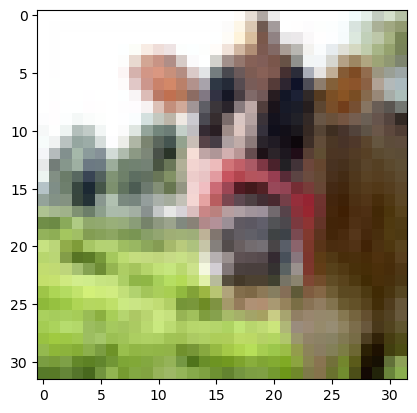

In [11]:
import matplotlib.pyplot as plt
plt.imshow(test_image);

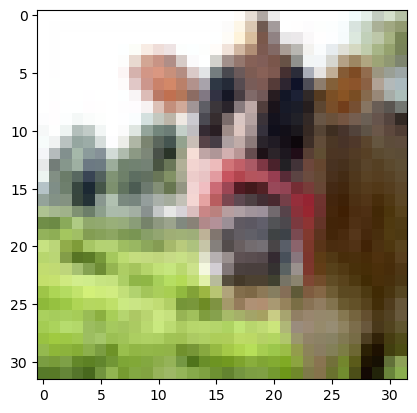

In [12]:
plt.imshow(combined);

In [13]:
dataset_train[b'fine_labels'][0]

19

In [14]:
type(dataset_train[b'fine_labels'][0])

int

Our image has a label of `19`, so let's see what the 19th item is in the list of label names.

In [15]:
print(dataset_meta[b'fine_label_names'][19])

b'cattle'


In [16]:
n = 0
print(dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][n]])

b'cattle'


In [17]:
print(dataset_train[b'filenames'][0])

b'bos_taurus_s_000507.png'


In [18]:
plt.imsave("file.png", test_image)

In the following cell, identify the label numbers for Bicycles and Motorcycles:

In [20]:
import pandas as pd

label = set()
for n in range(len(dataset_train[b'data'])):
    if dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][n]] == b'bicycle' or dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][n]] == b'motorcycle':
        label.add(dataset_train[b'fine_labels'][n])
        


In [21]:
label

{8, 48}

We only need objects with label 8 and 48

In [22]:

df_train = pd.DataFrame({
    "filenames": dataset_train[b'filenames'],
    "labels": dataset_train[b'fine_labels'],
    "row": range(len(dataset_train[b'filenames']))
})


df_train = df_train.drop(df_train[(df_train["labels"] != 8) & (df_train["labels"] != 48)].index, axis=0)


df_train["filenames"] = df_train["filenames"].apply(
    lambda x: x.decode("utf-8")
)


df_test = pd.DataFrame({
    "filenames": dataset_test[b'filenames'],
    "labels": dataset_test[b'fine_labels'],
    "row": range(len(dataset_test[b'filenames']))
})


df_test = df_test.drop(df_test[(df_test["labels"] != 8) & (df_test["labels"] != 48)].index, axis=0)

df_test["filenames"] = df_test["filenames"].apply(
    lambda x: x.decode("utf-8")
)

In [23]:
df_train.head()

,filenames,labels,row
16,bike_s_000682.png,8,16
30,bike_s_000127.png,8,30
130,cycle_s_002598.png,8,130
152,minibike_s_000824.png,48,152
195,motorcycle_s_001856.png,48,195


In [24]:
df_test.head()

,filenames,labels,row
27,safety_bike_s_000390.png,8,27
28,bike_s_000658.png,8,28
116,velocipede_s_001744.png,8,116
161,bike_s_000643.png,8,161
319,ordinary_bicycle_s_000437.png,8,319


Now that the data is filtered for just our classes, we can save all our images.

In [25]:
!mkdir ./train
!mkdir ./test

mkdir: cannot create directory ‘./train’: File exists
mkdir: cannot create directory ‘./test’: File exists


In [26]:
def save_images(df, index):
    
    if df is df_train:
        img = dataset_train[b'data'][index] 
    elif df is df_test:
        img = dataset_test[b'data'][index]
    
    
    target = np.dstack((
        img[0:1024].reshape(32,32),
        img[1024:2048].reshape(32,32),
        img[2048:].reshape(32,32)
    ))
    
    
    filename = df.loc[index, "filenames"]
    
    
    if df is df_train:
        plt.imsave(f"./train/{filename}", target)
    elif df is df_test: 
        plt.imsave(f"./test/{filename}", target)
    
    return


df_train.apply(lambda row: save_images(df_train, row.name), axis=1)
df_test.apply(lambda row: save_images(df_test, row.name), axis=1)

27      None
28      None
116     None
161     None
319     None
        ... 
9654    None
9692    None
9833    None
9928    None
9939    None
Length: 200, dtype: object

In [27]:
df_train.head()

,filenames,labels,row
16,bike_s_000682.png,8,16
30,bike_s_000127.png,8,30
130,cycle_s_002598.png,8,130
152,minibike_s_000824.png,48,152
195,motorcycle_s_001856.png,48,195


In [28]:
df_train["filenames"].iloc[0]

'bike_s_000682.png'

(32, 32)


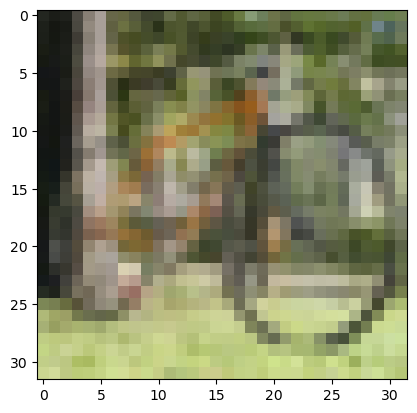

In [29]:
from PIL import Image
img = Image.open("./train/" + df_train["filenames"].iloc[0])
print(img.size)
plt.imshow(img)
plt.show()

### Load the data


In [ ]:
import sagemaker
from sagemaker.session import Session
from sagemaker import get_execution_role

role = get_execution_role()
session = sagemaker.Session()
region = session.boto_region_name
bucket = session.default_bucket()

bucket= bucket 
print("Default Bucket: {}".format(bucket))

print("Session: {}".format(session))

region = region
print("AWS Region: {}".format(region))

role = role
print("RoleArn: {}".format(role))

In [ ]:
import os

os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./train s3://${DEFAULT_S3_BUCKET}/l2project/train/
!aws s3 sync ./test s3://${DEFAULT_S3_BUCKET}/l2project/test/

## Model Training


In [32]:
def to_metadata_file(df, prefix):
    df["s3_path"] = df["filenames"]
    df["labels"] = df["labels"].apply(lambda x: 0 if x==8 else 1)
    return df[["row", "labels", "s3_path"]].to_csv(
        f"{prefix}.lst", sep="\t", index=False, header=False
    )
    
to_metadata_file(df_train.copy(), "train")
to_metadata_file(df_test.copy(), "test")

In [33]:
import boto3


boto3.Session().resource('s3').Bucket(
    bucket).Object('l2project/train.lst').upload_file('./train.lst')
boto3.Session().resource('s3').Bucket(
    bucket).Object('l2project/test.lst').upload_file('./test.lst')

## Model creation

In [34]:

algo_image = sagemaker.image_uris.retrieve('image-classification',region,'latest')
s3_output_location = f"s3://{bucket}/l2project/models/image_model"

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: latest.


In [35]:
img_classifier_model=sagemaker.estimator.Estimator(
    image_uri=algo_image,
    sagemaker_session=session,
    role=role,
    instance_count=1,
    instance_type = "ml.p3.2xlarge",
    output_path=s3_output_location

)

Hyperparameters definition

In [36]:
img_classifier_model.set_hyperparameters(
    image_shape= "3,32,32", 
    num_classes= 2, 
    num_training_samples= len(df_train) 
)

Model Inputs

In [37]:
from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput
model_inputs = {
        "train": sagemaker.inputs.TrainingInput(
            s3_data=f"s3://{bucket}/l2project/train/",
            content_type="application/x-image"
        ),
        "validation": sagemaker.inputs.TrainingInput(
            s3_data=f"s3://{bucket}/l2project/test/",
            content_type="application/x-image"
        ),
        "train_lst": sagemaker.inputs.TrainingInput(
            s3_data=f"s3://{bucket}/l2project/train.lst",
            content_type="application/x-image"
        ),
        "validation_lst": sagemaker.inputs.TrainingInput(
            s3_data=f"s3://{bucket}/l2project/test.lst",
            content_type="application/x-image"
        )
}

Model training

In [38]:
img_classifier_model.fit(model_inputs)

INFO:sagemaker:Creating training-job with name: image-classification-2024-04-01-18-27-31-072


2024-04-01 18:27:31 Starting - Starting the training job
2024-04-01 18:27:31 Pending - Training job waiting for capacity......
2024-04-01 18:28:26 Pending - Preparing the instances for training...
2024-04-01 18:28:55 Downloading - Downloading input data...
2024-04-01 18:29:15 Downloading - Downloading the training image...........................
2024-04-01 18:34:01 Training - Training image download completed. Training in progress.....Docker entrypoint called with argument(s): train
Running default environment configuration script
Nvidia gpu devices, drivers and cuda toolkit versions (only available on hosts with GPU):
Mon Apr  1 18:34:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Vol

In [5]:
# from sagemaker.model import Model

# image_uri = sagemaker.image_uris.retrieve(framework='image-classification',region=region)

# model_data = "s3://bucket/l2project/models/image_model/image-classification-2024-03-31-23-22-08-785/output/model.tar.gz"

# img_classifier_model = Model(image_uri=image_uri, model_data=model_data, role=role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


## Model deployment

In [39]:
from sagemaker.model_monitor import DataCaptureConfig

data_capture_config = DataCaptureConfig(enable_capture = True,
                                        sampling_percentage = 100,
                                        destination_s3_uri=f"s3://{bucket}/l2project/data_capture")


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [40]:
deployment = img_classifier_model.deploy(
    initial_instance_count=1,
    instance_type="ml.m5.xlarge",
    data_capture_config=data_capture_config
    )

endpoint = deployment.endpoint_name
print(endpoint)

INFO:sagemaker:Creating model with name: image-classification-2024-04-01-18-38-28-650
INFO:sagemaker:Creating endpoint-config with name image-classification-2024-04-01-18-38-28-650
INFO:sagemaker:Creating endpoint with name image-classification-2024-04-01-18-38-28-650


--------------!image-classification-2024-04-01-18-38-28-650


In [41]:
predictor = sagemaker.predictor.Predictor(endpoint)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [42]:
from sagemaker.serializers import IdentitySerializer
import base64
import json

predictor.serializer = IdentitySerializer("image/png")
with open("./test/bicycle_s_001789.png", "rb") as f:
    payload = base64.b64encode(f.read())

    
inference = predictor.predict((base64.b64decode(payload)), initial_args={'ContentType': 'image/png'})

In [43]:
print(inference)

b'[0.8232995271682739, 0.17670048773288727]'


### Make 3 lambda functions for automatic invokation of Model and prediction. Included in models/lambda.py

### StepFunction testing

In [ ]:
import random
import boto3
import json


def generate_test_case():
    
    s3 = boto3.resource('s3')
    
    # Randomly pick from sfn or test folders in our bucket
    objects = s3.Bucket(bucket).objects.filter(Prefix='l2project/test')
    
    
    obj = random.choice([x.key for x in objects])
    
    return json.dumps({
        "image_data": "",
        "s3_bucket": bucket,
        "s3_key": obj
    })
generate_test_case()

In [108]:
from sagemaker.s3 import S3Downloader

data_path = "s3://bucket/l2project/data_capture/image-classification-2024-04-01-18-38-28-650/AllTraffic/2024/04/01/19/"


S3Downloader.download(data_path, "captured_data")



sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


['captured_data/00-58-352-aee90f1e-8fcd-4888-9810-dd9fd4dfd104.jsonl',
 'captured_data/03-04-176-fb8c1f77-ec81-4697-8504-9d29611d4a9a.jsonl',
 'captured_data/21-13-714-12a464fa-1f4a-42a0-b0c1-49afc9bda348.jsonl',
 'captured_data/32-18-695-39f757b6-8ab7-4ce2-bc10-4430c3a19a39.jsonl',
 'captured_data/33-32-077-eed1b468-8451-4534-a224-ca5383680e29.jsonl',
 'captured_data/38-11-941-3ccba2b0-122f-4844-925d-7975fdd32e7f.jsonl',
 'captured_data/39-38-396-90d074a4-98eb-4178-aa8f-ed9923cebe6e.jsonl',
 'captured_data/40-52-760-526f87b1-86bd-4709-af3a-a49db42b99c4.jsonl',
 'captured_data/41-56-096-389215c4-8c46-4831-b4b3-64790706c43d.jsonl',
 'captured_data/43-07-989-d74d2814-1e32-400f-9a09-6a8c517ca4a3.jsonl']

In [52]:
!pip install jsonlines
import jsonlines

In [109]:
import os


file_handles = os.listdir("./captured_data")


json_data = []
for jsonl in file_handles:
    with jsonlines.open(f"./captured_data/{jsonl}") as f:
        json_data.append(f.read())

In [110]:

def simple_getter(obj):
    inferences = obj["captureData"]["endpointOutput"]["data"]
    timestamp = obj["eventMetadata"]["inferenceTime"]
    return json.loads(inferences), timestamp

simple_getter(json_data[0])

([0.980899453163147, 0.01910053938627243], '2024-04-01T19:00:58Z')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


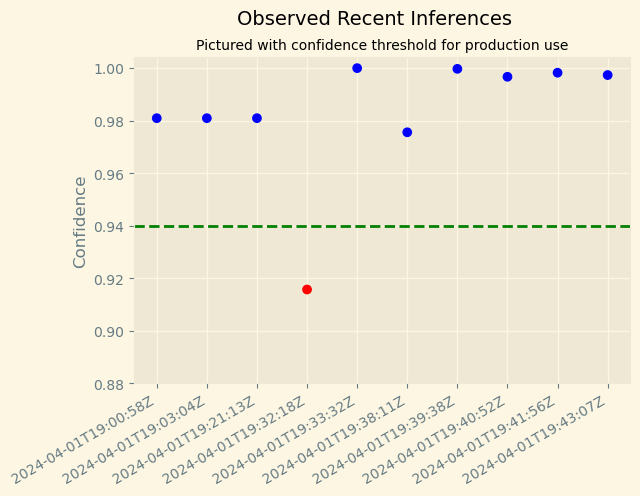

In [111]:

x = []
y = []
for obj in json_data:
    inference, timestamp = simple_getter(obj)
    
    y.append(max(inference))
    x.append(timestamp)


plt.scatter(x, y, c=['r' if k<.94 else 'b' for k in y ])
plt.axhline(y=0.94, color='g', linestyle='--')
plt.ylim(bottom=.88)


plt.ylabel("Confidence")
plt.suptitle("Observed Recent Inferences", size=14)
plt.title("Pictured with confidence threshold for production use", size=10)


plt.style.use("Solarize_Light2")
plt.gcf().autofmt_xdate()